## Projeto de Ciência de Dados:
- Professor: Ricardo Roberto de Lima

### 03 – Construir um outro projeto de Machine Learning (Regressão):
- Escolher um Dataset com Base qualquer: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction?select=CarPrice_Assignment.csv
- Construir um código com python que implemente o modelo de regressão linear.

### Desenvolvedores do Projeto:
- Lucca de Sena Barbosa
- Leonardo Lucas de Brito Silva

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go

In [2]:
database = pd.read_csv("database/CarPrice_Assignment.csv")
database

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
index_objects = []

for i in range(database.shape[1]):
    if database.dtypes[i] == object:
        index_objects.append(i)

#### Aplicando a codificação em colunas que possui objetos com o método **LabelEncoder**:

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

encoder = LabelEncoder()

for i in index_objects:
    database.iloc[:, i] = encoder.fit_transform(database.iloc[:, i]).astype(int)

In [13]:
database

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [14]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Encontrando a coluna na base de dados que possua a maior correlação com a classe

<Axes: >

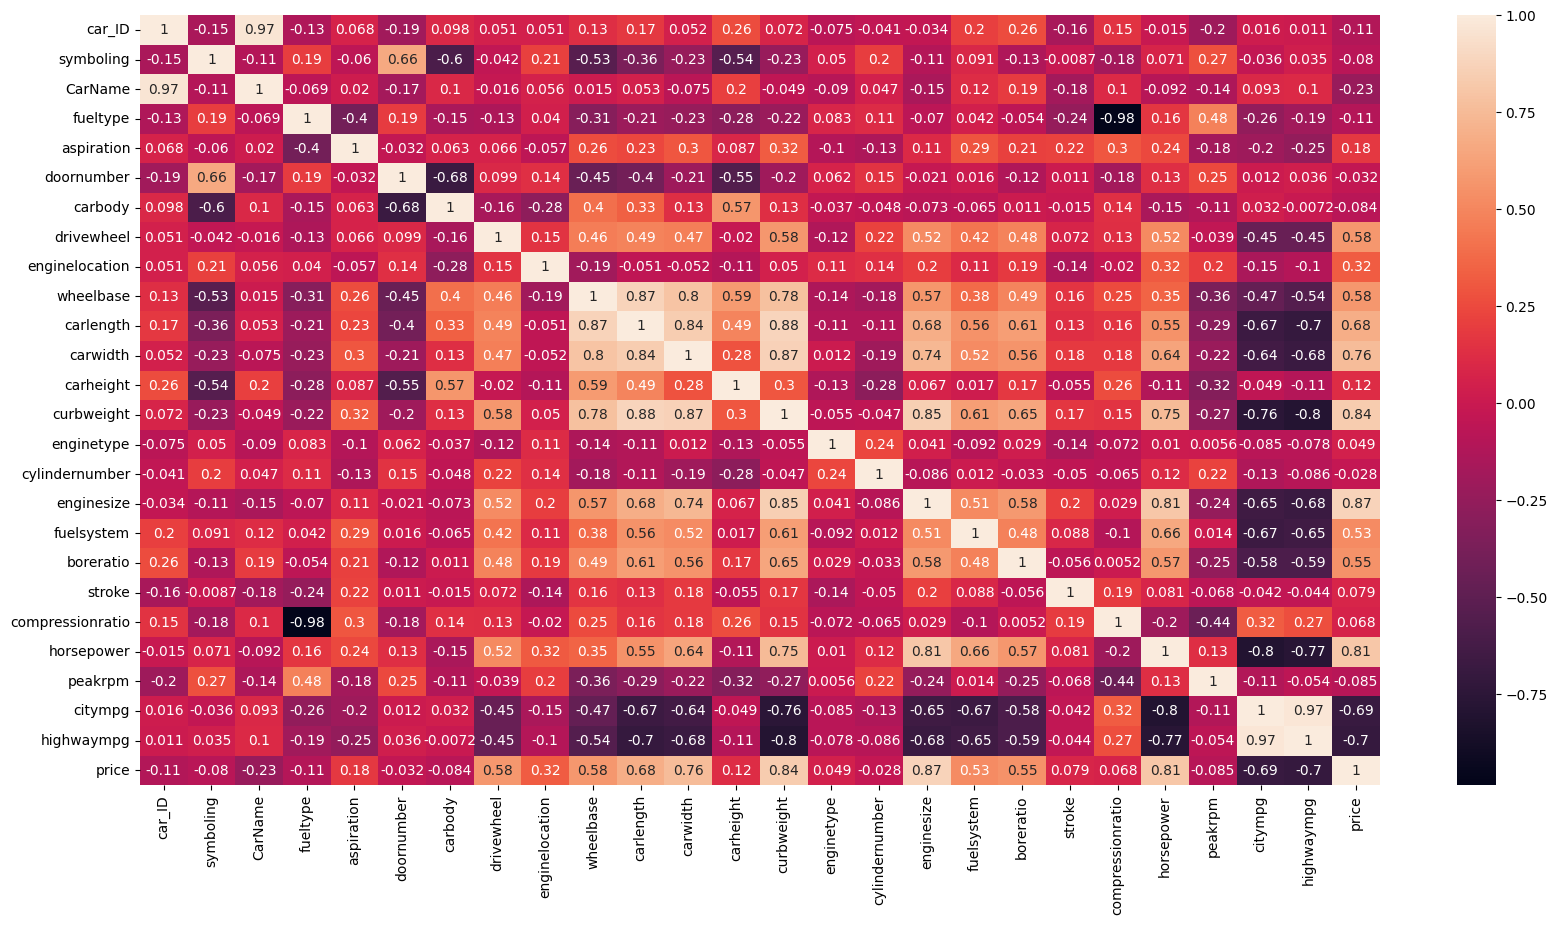

In [57]:
figura = plt.figure(figsize=(20, 10))
sn.heatmap(database.corr(), annot=True)

- Variável de maior correlação com o target (price): enginesize - 0.87 - Forte

### Criando variáveis que indicam classe e a coluna de maior correlação:

In [ ]:
x_values = database.iloc[:, 16].values # Coluna de maior correlação
y_values = database.iloc[:, 25].values # Classe

x_values, y_values

(array([130, 130, 152, 109, 136, 136, 136, 136, 131, 131, 108, 108, 164,
        164, 164, 209, 209, 209,  61,  90,  90,  90,  90,  98,  90,  90,
         90,  98, 122, 156,  92,  92,  79,  92,  92,  92,  92, 110, 110,
        110, 110, 110, 110, 111,  90,  90, 119, 258, 258, 326,  91,  91,
         91,  91,  91,  70,  70,  70,  80, 122, 122, 122, 122, 122, 122,
        140, 134, 183, 183, 183, 183, 234, 234, 308, 304, 140,  92,  92,
         92,  98, 110, 122, 156, 156, 156, 122, 122, 110, 110,  97, 103,
         97,  97,  97,  97,  97,  97,  97,  97, 120, 120, 181, 181, 181,
        181, 181, 181, 120, 152, 120, 152, 120, 152, 120, 152, 120, 152,
        134,  90,  98,  90,  90,  98, 122, 156, 151, 194, 194, 194, 203,
        132, 132, 121, 121, 121, 121, 121, 121,  97, 108, 108, 108, 108,
        108, 108, 108, 108, 108, 108, 108,  92,  92,  92,  92,  92,  92,
         98,  98, 110, 110,  98,  98,  98,  98,  98,  98,  98, 146, 146,
        146, 146, 146, 146, 122, 110, 122, 122, 122

### Dividindo as variáveis entre teste e treino:

In [71]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)

x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((164, 1), (41, 1), (164,), (41,))

### Treinando o modelo **LinearRegression**:

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [73]:
model.coef_, model.intercept_

(array([160.14046611]), np.float64(-7125.720842429395))

### Dados de Treino:

In [74]:
model.score(x_train, y_train)

0.7553563585112926

In [82]:
predicts_train = model.predict(x_train)
predicts_train

array([22179.98445592, 16254.78720981, 12411.41602314, 12411.41602314,
       20578.57979481, 12251.27555703,  7286.92110758, 10489.7304298 ,
       41556.98085538, 34190.51941427,  8568.04483647,  7447.06157369,
       14333.10161647, 10329.58996369,  8407.90437036, 10329.58996369,
        8568.04483647, 13692.53975203,  7607.2020398 ,  5685.51644647,
        8568.04483647, 45080.07110983,  7607.2020398 , 10169.44949758,
        7607.2020398 ,  8407.90437036, 10169.44949758,  9368.74716703,
       13692.53975203, 20258.29886259, 12411.41602314, 22179.98445592,
       10489.7304298 , 10489.7304298 ,  4084.11178536, 12411.41602314,
       15454.08487925, 10169.44949758, 19137.31559981,  7607.2020398 ,
        8568.04483647, 15454.08487925, 10169.44949758, 10169.44949758,
        8568.04483647,  7286.92110758, 12411.41602314, 21859.7035237 ,
        8407.90437036, 10169.44949758, 13692.53975203,  4084.11178536,
       14653.3825487 ,  8407.90437036, 16254.78720981,  8407.90437036,
      

In [78]:
mean_absolute_error(y_train, predicts_train)

2961.9188157504104

In [91]:
graph1 = px.scatter(x=x_train.ravel(), y=y_train)
graph2 = px.line(x=x_train.ravel(), y=predicts_train)
graph2.data[0].line.color = 'red'
graph3 = go.Figure(data=graph1.data + graph2.data)
graph3.show()

### Dados de Teste:

In [75]:
model.score(x_test, y_test)

0.7904263169216924

In [79]:
mean_absolute_error(y_test, predicts_test)

2404.0596741777836

In [76]:
predicts_test = model.predict(x_test)
predicts_test

array([ 5525.37598036, 30347.1482276 , 14653.3825487 ,  8568.04483647,
        7447.06157369, 12251.27555703,  7286.92110758, 12411.41602314,
        7447.06157369,  8568.04483647,  7607.2020398 , 17215.63000648,
        7286.92110758, 12251.27555703, 12411.41602314,  8407.90437036,
       15293.94441314, 10489.7304298 , 14333.10161647, 10489.7304298 ,
       12411.41602314,  8407.90437036, 10489.7304298 , 10329.58996369,
       19137.31559981,  7286.92110758, 15454.08487925, 10169.44949758,
       15454.08487925,  8568.04483647, 12411.41602314, 10169.44949758,
        7607.2020398 , 17055.48954036, 14012.82068425, 17856.19187092,
       17215.63000648,  8568.04483647,  7286.92110758, 11930.99462481,
       26343.63657482])

In [90]:
graph1 = px.scatter(x=x_test.ravel(), y=y_test)
graph2 = px.line(x=x_test.ravel(), y=predicts_test)
graph2.data[0].line.color = 'red'
graph3 = go.Figure(data=graph1.data + graph2.data)
graph3.show()